In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.19.0'

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('S37 - dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('S37 - dataset/dataset/test_set',
                                             target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

C:\Users\Mragakshi Garg\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

C:\Users\Mragakshi Garg\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 127ms/step - accuracy: 0.5292 - loss: 0.7077 - val_accuracy: 0.6695 - val_loss: 0.6259
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.6521 - loss: 0.6258 - val_accuracy: 0.6925 - val_loss: 0.5893
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.6968 - loss: 0.5784 - val_accuracy: 0.7280 - val_loss: 0.5559
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.7251 - loss: 0.5440 - val_accuracy: 0.7195 - val_loss: 0.5745
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.7563 - loss: 0.5040 - val_accuracy: 0.7205 - val_loss: 0.5664
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - accuracy: 0.7607 - loss: 0.4934 - val_accuracy: 0.7635 - val_loss: 0.4921
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.7779 - loss: 0.4715 - val_accuracy: 0.7730 - val_loss: 0.4845
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.7660 - loss: 0.4

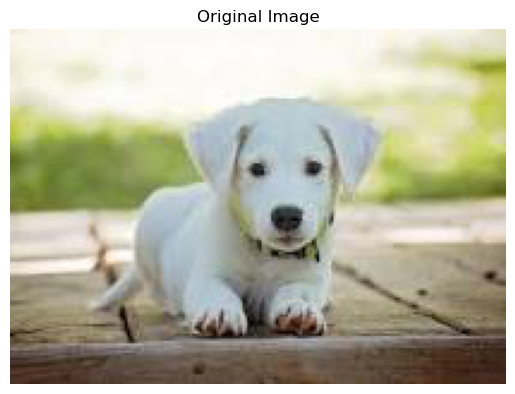

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image  
high_res_image = Image.open('S37 - dataset/dataset/prediction/dog_image2.jpeg')

# Show the high-resolution image clearly
plt.imshow(high_res_image)
plt.axis('off')
plt.title("Original Image")
plt.show()
test_image = image.load_img('S37 - dataset/dataset/prediction/dog_image2.jpeg', target_size = (64, 64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
test_image = test_image / 255.0 

if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [26]:
print(prediction)

dog


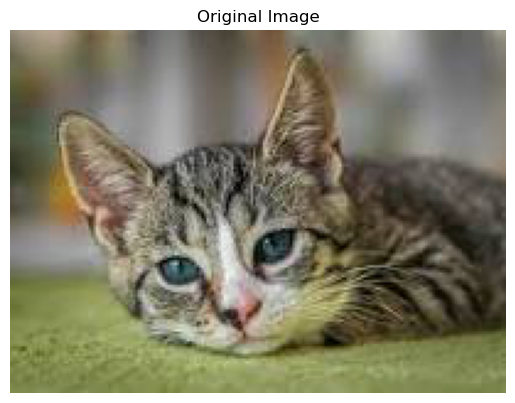

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [27]:
high_res_image = Image.open('S37 - dataset/dataset/prediction/cat_image2.jpeg')
plt.imshow(high_res_image)

plt.axis('off')
plt.title("Original Image")
plt.show()
test_image = image.load_img('S37 - dataset/dataset/prediction/cat_image2.jpeg', target_size = (64, 64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
test_image = test_image / 255.0 

if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [28]:
print(prediction)

cat
